# GroupBy

* 분리(split) - 적용(apply) - 결합(combine) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.shape

(244, 7)

In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [6]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [8]:
tips.index

RangeIndex(start=0, stop=244, step=1)

In [9]:
tips.index.nlevels

1

In [10]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [11]:
tips.columns.nlevels

1

* 성별 tip의 평균
    1. 성별(Female, Male) 부분집합을 찾는다 -> split(분리)
    2. 각 부분집합에서 tip 변수의 평균을 계산 -> apply(적용)
    3. 2번에서 계산된 결과를 하나로 합쳐서 표현 -> combine(결합)

1. Split

In [12]:
genders = tips['sex'].unique()
genders

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [13]:
female = tips[tips['sex'] == 'Female']
male = tips[tips['sex'] == 'Male']

In [14]:
female

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
226,10.09,2.00,Female,Yes,Fri,Lunch,2
229,22.12,2.88,Female,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2


In [15]:
male

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2


2. Apply

In [17]:
female_tip = female['tip'].mean()
male_tip = male['tip'].mean()

In [18]:
print('female tip mean:', female_tip)
print('male tip mean:', male_tip)

female tip mean: 2.833448275862069
male tip mean: 3.0896178343949052


3. Combine

In [20]:
# genders = tips['sex'].unique()
s = pd.Series(data=[female_tip, male_tip], index=genders)
s

Female    2.833448
Male      3.089618
dtype: float64

In [23]:
df = pd.DataFrame(data={'tip': [female_tip, male_tip]}, index=genders)
df

,tip
Female,2.833448
Male,3.089618


In [30]:
def groupby_mean(df, by, value):
    """
    : param df: DataFrame
    : param by: str. 그룹 기준이 되는 컬럼 이름 
    : param value: str. mean을 적용할 변수 이름 
    """
    categories = df[by].unique()
    mean_by_category = []
    for c in categories: 
        subset = df[df[by] == c]  # split
        avg = subset[value].mean()   # apply
        mean_by_category.append(avg)
    # combine
    # result = pd.Series(data=mean_by_category, index=categories)
    result = pd.DataFrame(data={value: mean_by_category}, index=categories)
    
    # 결과 리턴
    return result 

In [31]:
groupby_mean(df=tips, by='sex', value='tip')

,tip
Female,2.833448
Male,3.089618


In [36]:
tips.pivot_table(values='tip', index='sex', aggfunc='mean')

,tip
sex,
Male,3.089618
Female,2.833448


In [32]:
groupby_mean(df=tips, by='sex', value='total_bill')

,total_bill
Female,18.056897
Male,20.744076


In [37]:
tips.pivot_table(index='sex', values='total_bill', aggfunc='mean')

,total_bill
sex,
Male,20.744076
Female,18.056897


In [33]:
tips[tips['sex'] == 'Female']['total_bill'].mean()

18.056896551724137

In [34]:
groupby_mean(df=tips, by='day', value='tip')

,tip
Sun,3.255132
Sat,2.993103
Thur,2.771452
Fri,2.734737


In [35]:
tips[tips['day'] == 'Thur']['tip'].mean()

2.771451612903226

In [38]:
tips.pivot_table(index='day', values='tip', aggfunc='mean')

,tip
day,
Thur,2.771452
Fri,2.734737
Sat,2.993103
Sun,3.255132


`pd.DataFrame.groupby()` 메서드 

In [39]:
grouped = tips.groupby(by='sex')
grouped

In [43]:
for cls, subset in grouped:
    print('Class:', cls)
    print(subset)
    print('-' * 50, '\n')
print(type(cls), type(subset))

Class: Male
     total_bill   tip   sex smoker  day    time  size
1         10.34  1.66  Male     No  Sun  Dinner     3
2         21.01  3.50  Male     No  Sun  Dinner     3
3         23.68  3.31  Male     No  Sun  Dinner     2
5         25.29  4.71  Male     No  Sun  Dinner     4
6          8.77  2.00  Male     No  Sun  Dinner     2
..          ...   ...   ...    ...  ...     ...   ...
236       12.60  1.00  Male    Yes  Sat  Dinner     2
237       32.83  1.17  Male    Yes  Sat  Dinner     2
239       29.03  5.92  Male     No  Sat  Dinner     3
241       22.67  2.00  Male    Yes  Sat  Dinner     2
242       17.82  1.75  Male     No  Sat  Dinner     2

[157 rows x 7 columns]
-------------------------------------------------- 

Class: Female
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
11        35.26  5.00  Female     No   Sun  Dinner     4
14        14.83  3.02

In [44]:
grouped = tips.groupby(by='day')
for cls, subset in grouped:
    print(cls)
    print(subset)
    print('-' * 50, '\n')

Thur
     total_bill   tip     sex smoker   day    time  size
77        27.20  4.00    Male     No  Thur   Lunch     4
78        22.76  3.00    Male     No  Thur   Lunch     2
79        17.29  2.71    Male     No  Thur   Lunch     2
80        19.44  3.00    Male    Yes  Thur   Lunch     2
81        16.66  3.40    Male     No  Thur   Lunch     2
..          ...   ...     ...    ...   ...     ...   ...
202       13.00  2.00  Female    Yes  Thur   Lunch     2
203       16.40  2.50  Female    Yes  Thur   Lunch     2
204       20.53  4.00    Male    Yes  Thur   Lunch     4
205       16.47  3.23  Female    Yes  Thur   Lunch     3
243       18.78  3.00  Female     No  Thur  Dinner     2

[62 rows x 7 columns]
-------------------------------------------------- 

Fri
     total_bill   tip     sex smoker  day    time  size
90        28.97  3.00    Male    Yes  Fri  Dinner     2
91        22.49  3.50    Male     No  Fri  Dinner     2
92         5.75  1.00  Female    Yes  Fri  Dinner     2
93     

In [46]:
# 성별 tip의 평균
tips.groupby(by='sex')['tip'].mean()  #> Series: shape(2,)

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [48]:
tips.groupby(by='sex')[['tip']].mean()  #> DataFrame: shape(2, 1)

,tip
sex,
Male,3.089618
Female,2.833448


In [50]:
tips[['tip', 'total_bill']]

,tip,total_bill
0,1.01,16.99
1,1.66,10.34
2,3.50,21.01
3,3.31,23.68
4,3.61,24.59
...,...,...
239,5.92,29.03
240,2.00,27.18
241,2.00,22.67
242,1.75,17.82


In [51]:
tips[['tip']]

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


* 성별 total_bill과 tip의 중앙값 

In [66]:
# groupby() 메서드
g = tips.groupby(by='sex')[['total_bill', 'tip']].median()
g

,total_bill,tip
sex,,
Male,18.35,3.00
Female,16.40,2.75


In [67]:
# pivot_table() 메서드
p = tips.pivot_table(index='sex', values=['total_bill', 'tip'], aggfunc='median')
p

,tip,total_bill
sex,,
Male,3.00,18.35
Female,2.75,16.40


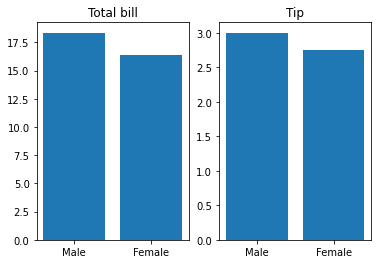

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].bar(x=g.index, height=g['total_bill'])
axes[0].set_title('Total bill')

axes[1].bar(x=g.index, height=g['tip'])
axes[1].set_title('Tip')

plt.show()

* 성별, 흡연여부별 tip의 평균

In [81]:
# groupby() 
g = tips.groupby(by=['sex', 'smoker'])[['tip']].mean()
g

tip
sex    smoker          
Male   Yes     3.051167
       No      3.113402
Female Yes     2.931515
       No      2.773519

In [61]:
# pivot_table()
tips.pivot_table(index=['sex', 'smoker'], values='tip', aggfunc='mean')

tip
sex    smoker          
Male   Yes     3.051167
       No      3.113402
Female Yes     2.931515
       No      2.773519

In [97]:
df = g.unstack()  # unstack() 메서드: multi=index를 컬럼으로 변환
df

tip          
smoker       Yes        No
sex                       
Male    3.051167  3.113402
Female  2.931515  2.773519

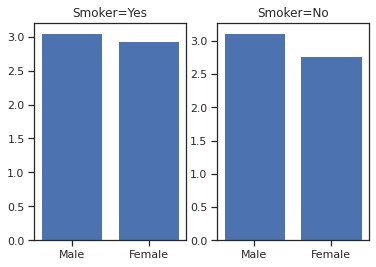

In [99]:
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].bar(x=df.index, height=df[('tip', 'Yes')])
axes[0].set_title('Smoker=Yes')

axes[1].bar(x=df.index, height=df[('tip', 'No')])
axes[1].set_title('Smoker=No')

plt.show()

In [85]:
g.unstack()[('tip', 'No')]

sex
Male      3.113402
Female    2.773519
Name: (tip, No), dtype: float64

In [86]:
tips.pivot_table(index='sex', columns='smoker', values='tip')

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


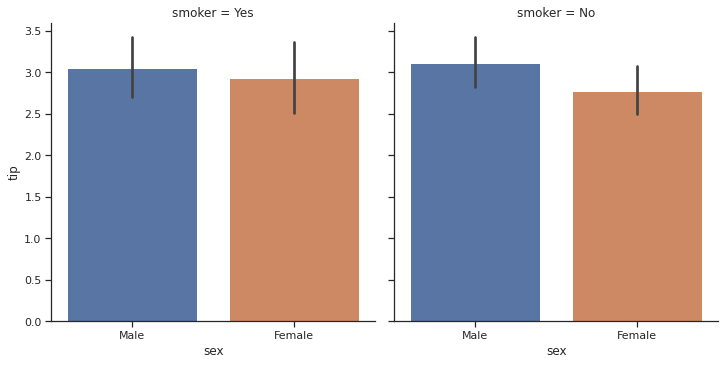

In [93]:
sns.set(style="ticks")
sns.catplot(data=tips, x='sex', y='tip', col='smoker', kind='bar')
# plt.grid()
plt.show()

* 성별 tip의 최댓값

In [106]:
tips.groupby(by='sex')[['tip']].max()

,tip
sex,
Male,10.0
Female,6.5


In [103]:
tips.pivot_table(values='tip', index='sex', aggfunc='max')

,tip
sex,
Male,10.0
Female,6.5


* 성별 tip의 최솟값 

In [104]:
tips.groupby(by='sex')[['tip']].min()

,tip
sex,
Male,1.0
Female,1.0


In [108]:
tips.pivot_table(values='tip', index='sex', aggfunc=['max', 'min'])

,max,min
,tip,tip
sex,,
Male,10.0,1.0
Female,6.5,1.0


* 성별 시간별 tip의 중앙값

In [121]:
g = tips.groupby(by=['sex', 'time'])[['tip']].median()
g

tip
sex    time        
Male   Lunch   2.31
       Dinner  3.00
Female Lunch   2.01
       Dinner  3.00

In [122]:
g.unstack()   # multi-index -> columns 

tip       
time   Lunch Dinner
sex                
Male    2.31    3.0
Female  2.01    3.0

In [123]:
g.unstack(level=0)

tip       
sex     Male Female
time               
Lunch   2.31   2.01
Dinner  3.00   3.00

In [112]:
tips.pivot_table(index=['sex', 'time'], values='tip', aggfunc='median')

tip
sex    time        
Male   Lunch   2.31
       Dinner  3.00
Female Lunch   2.01
       Dinner  3.00

In [120]:
tips.pivot_table(values='tip', index='sex', columns='time', aggfunc='median')

time,Lunch,Dinner
sex,,
Male,2.31,3.0
Female,2.01,3.0


* 성별, 시간별, 요일별 total_bill의 중앙값

In [124]:
g = tips.groupby(by=['sex', 'time', 'day'])[['total_bill']].median()
g

total_bill
sex    time   day             
Male   Lunch  Thur      16.975
              Fri       12.160
              Sat          NaN
              Sun          NaN
       Dinner Thur         NaN
              Fri       22.490
              Sat       18.240
              Sun       20.725
Female Lunch  Thur      13.420
              Fri       14.700
              Sat          NaN
              Sun          NaN
       Dinner Thur      18.780
              Fri       15.380
              Sat       18.360
              Sun       17.410

In [125]:
g.unstack()

total_bill                      
day                 Thur    Fri    Sat     Sun
sex    time                                   
Male   Lunch      16.975  12.16    NaN     NaN
       Dinner        NaN  22.49  18.24  20.725
Female Lunch      13.420  14.70    NaN     NaN
       Dinner     18.780  15.38  18.36  17.410

In [128]:
g.unstack(level=[1, 2])

total_bill                                            
time        Lunch                Dinner                      
day          Thur    Fri Sat Sun   Thur    Fri    Sat     Sun
sex                                                          
Male       16.975  12.16 NaN NaN    NaN  22.49  18.24  20.725
Female     13.420  14.70 NaN NaN  18.78  15.38  18.36  17.410

In [130]:
tips.pivot_table(index=['sex', 'time', 'day'], values='total_bill', aggfunc=np.median,
                 dropna=False)
#  참고: dropna=True/False

total_bill
sex    time   day             
Male   Lunch  Thur      16.975
              Fri       12.160
              Sat          NaN
              Sun          NaN
       Dinner Thur         NaN
              Fri       22.490
              Sat       18.240
              Sun       20.725
Female Lunch  Thur      13.420
              Fri       14.700
              Sat          NaN
              Sun          NaN
       Dinner Thur      18.780
              Fri       15.380
              Sat       18.360
              Sun       17.410

In [131]:
tips.pivot_table(values='total_bill', index=['sex', 'time'], columns=['day'], aggfunc='median')

day              Thur    Fri    Sat     Sun
sex    time                                
Male   Lunch   16.975  12.16    NaN     NaN
       Dinner     NaN  22.49  18.24  20.725
Female Lunch   13.420  14.70    NaN     NaN
       Dinner  18.780  15.38  18.36  17.410

In [132]:
tips.pivot_table(values='total_bill', index='sex', columns=['time', 'day'], aggfunc='median')

time     Lunch        Dinner                      
day       Thur    Fri   Thur    Fri    Sat     Sun
sex                                               
Male    16.975  12.16    NaN  22.49  18.24  20.725
Female  13.420  14.70  18.78  15.38  18.36  17.410

* 성별, 흡연여부별, 시간별, 요일별 total_bill의 중앙값 

In [133]:
g = tips.groupby(by=['sex', 'smoker', 'time', 'day'])[['total_bill']].median()
g

total_bill
sex    smoker time   day             
Male   Yes    Lunch  Thur      17.645
                     Fri       12.160
                     Sat          NaN
                     Sun          NaN
              Dinner Thur         NaN
                     Fri       27.280
                     Sat       20.290
                     Sun       23.330
       No     Lunch  Thur      16.975
                     Fri          NaN
                     Sat          NaN
                     Sun          NaN
              Dinner Thur         NaN
                     Fri       17.475
                     Sat       17.870
                     Sun       19.490
Female Yes    Lunch  Thur      16.400
                     Fri       13.420
                     Sat          NaN
                     Sun          NaN
              Dinner Thur         NaN
                     Fri       13.365
                     Sat       22.120
                     Sun       17.830
       No     Lunch  Thur      13.290
                     Fri       15.980
                     Sat          NaN
                     Sun          NaN
              Dinner Thur      18.780
                     Fri       22.750
                     Sat       17.070
                     Sun       17.150

In [117]:
tips.pivot_table(index=['sex', 'smoker', 'time', 'day'], values='total_bill', aggfunc='median')

total_bill
sex    smoker time   day             
Male   Yes    Lunch  Thur      17.645
                     Fri       12.160
              Dinner Fri       27.280
                     Sat       20.290
                     Sun       23.330
       No     Lunch  Thur      16.975
              Dinner Fri       17.475
                     Sat       17.870
                     Sun       19.490
Female Yes    Lunch  Thur      16.400
                     Fri       13.420
              Dinner Fri       13.365
                     Sat       22.120
                     Sun       17.830
       No     Lunch  Thur      13.290
                     Fri       15.980
              Dinner Thur      18.780
                     Fri       22.750
                     Sat       17.070
                     Sun       17.150

* 성별, 흡연여부별, 시간별, 요일별 total_bill, tip의 평균

In [135]:
g = tips.groupby(by=['sex', 'smoker', 'time', 'day'])[['total_bill', 'tip']].mean()
g

total_bill       tip
sex    smoker time   day                       
Male   Yes    Lunch  Thur   19.171000  3.058000
                     Fri    11.386667  1.900000
                     Sat          NaN       NaN
                     Sun          NaN       NaN
              Dinner Thur         NaN       NaN
                     Fri    25.892000  3.246000
                     Sat    21.837778  2.879259
                     Sun    26.141333  3.521333
       No     Lunch  Thur   18.486500  2.941500
                     Fri          NaN       NaN
                     Sat          NaN       NaN
                     Sun          NaN       NaN
              Dinner Thur         NaN       NaN
                     Fri    17.475000  2.500000
                     Sat    19.929063  3.256563
                     Sun    20.403256  3.115349
Female Yes    Lunch  Thur   19.218571  2.990000
                     Fri    13.260000  2.660000
                     Sat          NaN       NaN
                     Sun          NaN       NaN
              Dinner Thur         NaN       NaN
                     Fri    12.200000  2.700000
                     Sat    20.266667  2.868667
                     Sun    16.540000  3.500000
       No     Lunch  Thur   15.899167  2.437083
                     Fri    15.980000  3.000000
                     Sat          NaN       NaN
                     Sun          NaN       NaN
              Dinner Thur   18.780000  3.000000
                     Fri    22.750000  3.250000
                     Sat    19.003846  2.724615
                     Sun    20.824286  3.329286

In [136]:
tips.pivot_table(index=['sex', 'smoker', 'time', 'day'], values=['total_bill', 'tip'], aggfunc='mean')

tip  total_bill
sex    smoker time   day                       
Male   Yes    Lunch  Thur  3.058000   19.171000
                     Fri   1.900000   11.386667
              Dinner Fri   3.246000   25.892000
                     Sat   2.879259   21.837778
                     Sun   3.521333   26.141333
       No     Lunch  Thur  2.941500   18.486500
              Dinner Fri   2.500000   17.475000
                     Sat   3.256563   19.929063
                     Sun   3.115349   20.403256
Female Yes    Lunch  Thur  2.990000   19.218571
                     Fri   2.660000   13.260000
              Dinner Fri   2.700000   12.200000
                     Sat   2.868667   20.266667
                     Sun   3.500000   16.540000
       No     Lunch  Thur  2.437083   15.899167
                     Fri   3.000000   15.980000
              Dinner Thur  3.000000   18.780000
                     Fri   3.250000   22.750000
                     Sat   2.724615   19.003846
                     Sun   3.329286   20.824286

## 두 개 이상의 집계 함수 적용 

* 1개 변수에 2개 이상의 집계 함수 적용

In [137]:
# 시간별 tip의 최솟값, 최댓값
tips.groupby(by='time')[['tip']].aggregate(['min', 'max'])
# aggregate(), agg()는 동일

tip      
         min   max
time              
Lunch   1.25   6.7
Dinner  1.00  10.0

In [139]:
tips.pivot_table(values='tip', index='time', aggfunc=['min', 'max'])

,min,max
,tip,tip
time,,
Lunch,1.25,6.7
Dinner,1.00,10.0


* 2개 이상의 변수에 2개 이상의 집계 함수 동일하게 적용

In [140]:
# 시간별 total_bill, tip의 최솟값, 최댓값
tips.groupby(by='time')[['total_bill', 'tip']].agg(['min', 'max'])

total_bill          tip      
              min    max   min   max
time                                
Lunch        7.51  43.11  1.25   6.7
Dinner       3.07  50.81  1.00  10.0

In [142]:
tips.pivot_table(values=['total_bill', 'tip'], index='time', aggfunc=['min', 'max'])

min              max           
         tip total_bill   tip total_bill
time                                    
Lunch   1.25       7.51   6.7      43.11
Dinner  1.00       3.07  10.0      50.81

* 2개 이상의 변수에 각각 다른 집계 함수(들)을 적용

In [143]:
# 시간별 total_bill의 평균, 시간별 tip의 최솟값과 최댓값 
tips.groupby(by='time')[['total_bill', 'tip']].agg({'total_bill':'mean',
                                                    'tip': ['min', 'max']})

total_bill   tip      
             mean   min   max
time                         
Lunch   17.168676  1.25   6.7
Dinner  20.797159  1.00  10.0

In [144]:
tips.pivot_table(values=['total_bill', 'tip'], 
                 index='time',
                 aggfunc={'total_bill': 'mean',
                          'tip': ['min', 'max']})

tip       total_bill
         max   min       mean
time                         
Lunch    6.7  1.25  17.168676
Dinner  10.0  1.00  20.797159

* tips 데이터프레임에 `tip_pct = tip / total_bill` 파생 변수 추가
* 시간별, 흡연여부별, 요일별 total_bill의 평균, tip_pct의 평균과 표준편차, tip의 최댓값, 최솟값

In [153]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [155]:
tips.groupby(by=['time', 'smoker', 'day'])[['total_bill', 'tip_pct', 'tip']].agg({
    'total_bill':'mean',                      
    'tip_pct': ['mean', 'std'],
    'tip': ['max', 'min']})

total_bill   tip_pct              tip      
                         mean      mean       std    max   min
time   smoker day                                             
Lunch  Yes    Thur  19.190588  0.163863  0.039389   5.00  2.00
              Fri   12.323333  0.188937  0.050262   3.48  1.58
              Sat         NaN       NaN       NaN    NaN   NaN
              Sun         NaN       NaN       NaN    NaN   NaN
       No     Thur  17.075227  0.160311  0.039222   6.70  1.25
              Fri   15.980000  0.187735       NaN   3.00  3.00
              Sat         NaN       NaN       NaN    NaN   NaN
              Sun         NaN       NaN       NaN    NaN   NaN
Dinner Yes    Thur        NaN       NaN       NaN    NaN   NaN
              Fri   19.806667  0.165347  0.052676   4.73  1.00
              Sat   21.276667  0.147906  0.061375  10.00  1.00
              Sun   24.120000  0.187250  0.154134   6.50  1.50
       No     Thur  18.780000  0.159744       NaN   3.00  3.00
              Fri   19.233333  0.139622  0.017841   3.50  1.50
              Sat   19.661778  0.158048  0.039767   9.00  1.00
              Sun   20.506667  0.160113  0.042347   6.00  1.01

* [gapminder](https://github.com/JakeOh/202011_itw_bd21/raw/main/datasets/gapminder.tsv) 파일을 읽고 DataFrame을 생성
* 연도별 대륙별 인구숫자를 `groupby`를 사용해서 집계 
* 연도별 대륙별 인구숫자를 `pivot_table`를 사용해서 집계 
* 선그래프(x축-연도, y축-인구, 색깔-대륙) 그릴 수 있도록 groupby 결과를 변형
* 선그래프 시각화 

In [157]:
file_path = 'https://github.com/JakeOh/202011_itw_bd21/raw/main/datasets/gapminder.tsv'
gapminder = pd.read_csv(file_path, sep='\t')
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [205]:
gapminder.shape

(1704, 6)

In [206]:
gapminder.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [207]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [211]:
grouped = gapminder.groupby(['year', 'continent'])[['pop']].sum()
grouped

pop
year continent            
1952 Africa      237640501
     Americas    345152446
     Asia       1395357351
     Europe      418120846
     Oceania      10686006
1957 Africa      264837738
     Americas    386953916
     Asia       1562780599
     Europe      437890351
     Oceania      11941976
1962 Africa      296516865
     Americas    433270254
     Asia       1696357182
     Europe      460355155
     Oceania      13283518
1967 Africa      335289489
     Americas    480746623
     Asia       1905662900
     Europe      481178958
     Oceania      14600414
1972 Africa      379879541
     Americas    529384210
     Asia       2150972248
     Europe      500635059
     Oceania      16106100
1977 Africa      433061021
     Americas    578067699
     Asia       2384513556
     Europe      517164531
     Oceania      17239000
1982 Africa      499348587
     Americas    630290920
     Asia       2610135582
     Europe      531266901
     Oceania      18394850
1987 Africa      574834110
     Americas    682753971
     Asia       2871220762
     Europe      543094160
     Oceania      19574415
1992 Africa      659081517
     Americas    739274104
     Asia       3133292191
     Europe      558142797
     Oceania      20919651
1997 Africa      743832984
     Americas    796900410
     Asia       3383285500
     Europe      568944148
     Oceania      22241430
2002 Africa      833723916
     Americas    849772762
     Asia       3601802203
     Europe      578223869
     Oceania      23454829
2007 Africa      929539692
     Americas    898871184
     Asia       3811953827
     Europe      586098529
     Oceania      24549947

In [212]:
df = grouped.unstack()
df

pop                                            
continent     Africa   Americas        Asia     Europe   Oceania
year                                                            
1952       237640501  345152446  1395357351  418120846  10686006
1957       264837738  386953916  1562780599  437890351  11941976
1962       296516865  433270254  1696357182  460355155  13283518
1967       335289489  480746623  1905662900  481178958  14600414
1972       379879541  529384210  2150972248  500635059  16106100
1977       433061021  578067699  2384513556  517164531  17239000
1982       499348587  630290920  2610135582  531266901  18394850
1987       574834110  682753971  2871220762  543094160  19574415
1992       659081517  739274104  3133292191  558142797  20919651
1997       743832984  796900410  3383285500  568944148  22241430
2002       833723916  849772762  3601802203  578223869  23454829
2007       929539692  898871184  3811953827  586098529  24549947

In [213]:
gapminder.pivot_table(index='year', columns='continent', values='pop', aggfunc='sum')

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,237640501,345152446,1395357351,418120846,10686006
1957,264837738,386953916,1562780599,437890351,11941976
1962,296516865,433270254,1696357182,460355155,13283518
1967,335289489,480746623,1905662900,481178958,14600414
1972,379879541,529384210,2150972248,500635059,16106100
1977,433061021,578067699,2384513556,517164531,17239000
1982,499348587,630290920,2610135582,531266901,18394850
1987,574834110,682753971,2871220762,543094160,19574415
1992,659081517,739274104,3133292191,558142797,20919651


In [222]:
df.columns

MultiIndex([('pop',   'Africa'),
            ('pop', 'Americas'),
            ('pop',     'Asia'),
            ('pop',   'Europe'),
            ('pop',  'Oceania')],
           names=[None, 'continent'])

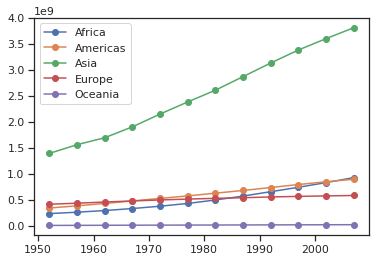

In [225]:
# plt.plot(df.index, df[('pop', 'Asia')], 'o-')
# plt.plot(df.index, df[('pop', 'Africa')], 'o-')
# plt.plot(df.index, df[('pop', 'Americas')], 'o-')
for col in df.columns:
    plt.plot(df.index, df[col], 'o-', label=col[1])

plt.legend()
plt.show()

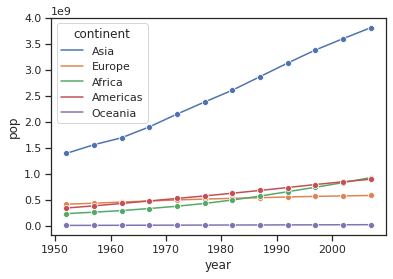

In [228]:
sns.lineplot(data=gapminder, x='year', y='pop', hue='continent',
             estimator='sum', err_style=None, marker='o')
plt.show()

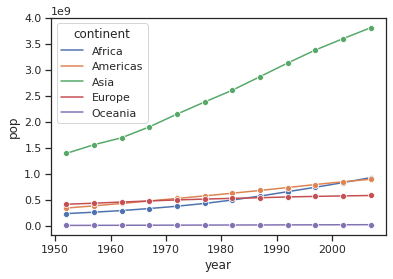

In [232]:
sns.lineplot(data=grouped, x='year', y='pop', hue='continent', marker='o')
plt.show()

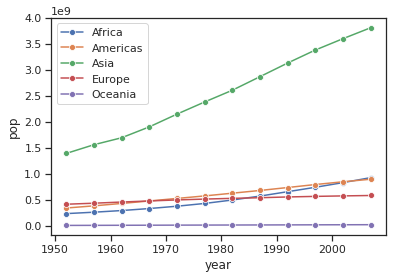

In [245]:
for col in df.columns:
    sns.lineplot(data=df, x='year', y=col, marker='o', label=col[1])

plt.ylabel('pop')
plt.show()